In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Data/Ridership.csv')
df.head()

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
0,2019,January,1,1,Corridor_1,n,Station_1,Weekend/Holiday,174,3,0
1,2019,January,1,1,Corridor_1,n,Station_2,Weekend/Holiday,378,10,0
2,2019,January,1,1,Corridor_1,n,Station_3,Weekend/Holiday,599,12,0
3,2019,January,1,1,Corridor_2,n,Station_4,Weekend/Holiday,2759,35,0
4,2019,January,1,1,Corridor_2,n,Station_5,Weekend/Holiday,2629,36,0


In [5]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
                 'May': 5, 'June': 6, 'July': 7, 'August': 8,
                 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['month'] = df['Month'].map(month_mapping)
df['Date'] = pd.to_datetime(df[['Year', 'month', 'Day']])
df.drop(columns=['month'], inplace=True)
df.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19,Date
31764,2020,December,7,50,Corridor_4,y,Station_11,PM Peak,38,2,1,2020-12-07
1926,2019,February,5,6,Corridor_4,y,Station_3,PM Peak,5936,5,0,2019-02-05
61621,2022,November,3,44,Corridor_3,y,Station_4,PM Peak,609,3,0,2022-11-03
31192,2020,November,23,48,Corridor_3,y,Station_3,Evening,292,9,1,2020-11-23
47395,2021,December,15,50,Corridor_1,y,Station_1,AM Peak,733,5,1,2021-12-15
51886,2022,March,29,13,Corridor_1,y,Station_1,AM Peak,1110,3,0,2022-03-29
4760,2019,April,2,14,Corridor_5,y,Station_3,Evening,1586,2,0,2019-04-02
24300,2020,May,20,21,Corridor_5,y,Station_19,AM Peak,122,3,1,2020-05-20
14596,2019,October,27,43,Corridor_3,n,Station_3,Weekend/Holiday,3666,40,0,2019-10-27
21172,2020,March,4,10,Corridor_4,y,Station_7,Midday,332,1,1,2020-03-04


In [ ]:
df.to_parquet('Data/parquet_by_day', engine='pyarrow', compression='snappy', partition_cols=['Date'])

In [9]:
from glob import glob

days_to_query = ['2019-01-01', '2019-01-02', '2019-01-03']
files_to_load = []

for day in days_to_query:
    files_to_load.extend(glob(f'Data/parquet_by_day/Date={day}%*/*.parquet'))

df_filtered = pd.concat([pd.read_parquet(file) for file in files_to_load], ignore_index=True)
df_filtered.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
8,2019,January,1,1,Corridor_3,n,Station_3,Weekend/Holiday,17,1,0
20,2019,January,2,1,Corridor_4,y,Station_8,AM Peak,1702,2,0
111,2019,January,3,1,Corridor_2,y,Station_4,PM Peak,2970,5,0
15,2019,January,2,1,Corridor_1,y,Station_6,Midday,422,2,0
154,2019,January,3,1,Corridor_6,y,Station_3,PM Peak,2397,4,0
139,2019,January,3,1,Corridor_3,y,Station_5,Evening,4300,11,0
67,2019,January,2,1,Corridor_3,y,Station_3,Midday,55,2,0
39,2019,January,2,1,Corridor_2,y,Station_5,AM Peak,7546,11,0
82,2019,January,2,1,Corridor_7,y,Station_3,PM Peak,3487,4,0
59,2019,January,2,1,Corridor_3,y,Station_13,Midday,610,6,0


In [10]:
files_to_load2 = []
files_to_load2.extend(glob(f'Data/parquet_by_day/Date=*/*.parquet'))

df_filtered2 = pd.concat([pd.read_parquet(file) for file in files_to_load2], ignore_index=True)
df_filtered2.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
1705,2019,January,31,5,Corridor_2,y,Station_3,PM Peak,2717,2,0
33656,2021,January,21,3,Corridor_3,y,Station_3,Midday,253,12,1
49095,2022,January,19,3,Corridor_5,y,Station_3,PM Peak,513,4,1
37921,2021,May,18,20,Corridor_3,y,Station_4,PM Peak,224,6,1
18090,2020,January,3,1,Corridor_3,y,Station_15,Midday,464,1,0
9715,2019,July,18,29,Corridor_3,y,Station_13,Midday,798,6,0
53951,2022,May,17,20,Corridor_7,y,Station_21,Midday,249,1,0
34543,2021,February,16,7,Corridor_4,y,Station_11,Midday,90,5,1
10034,2019,July,25,30,Corridor_4,y,Station_11,Midday,1028,6,0
39040,2021,June,17,24,Corridor_7,y,Station_3,Evening,48,1,1


In [ ]:
from glob import glob

days_to_query = ['2019-01-01', '2019-01-02', '2019-01-03']
files_to_load = []

for day in days_to_query:
    files_to_load.extend(glob(f'Data/parquet_by_day/Date={day}%*/*.parquet'))

df_filtered = pd.concat([pd.read_parquet(file, columns=['Year', 'Month', 'Day', 'Ridership']) for file in files_to_load], ignore_index=True)
df_filtered.sample(10)

,Year,Month,Day,Ridership
47,2019,January,2,274
126,2019,January,3,37
62,2019,January,2,2646
69,2019,January,2,1232
124,2019,January,3,325
104,2019,January,3,65
22,2019,January,2,535
128,2019,January,3,1091
70,2019,January,2,5816
122,2019,January,3,19


# July11th

In [6]:
import pandas as pd

df = pd.read_csv('Data/Ridership.csv')
df.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
25721,2020,June,30,27,Corridor_3,y,Station_4,PM Peak,213,3,1
31737,2020,December,6,49,Corridor_1,n,Station_6,Weekend/Holiday,23,3,1
16374,2019,November,29,48,Corridor_1,y,Station_3,PM Peak,4243,5,0
11336,2019,August,22,34,Corridor_2,y,Station_5,PM Peak,1637,11,0
10343,2019,July,31,31,Corridor_6,y,Station_20,AM Peak,3159,4,0
35292,2021,March,8,10,Corridor_2,y,Station_3,Midday,290,12,1
11869,2019,September,3,36,Corridor_3,y,Station_13,PM Peak,260,3,0
31738,2020,December,6,49,Corridor_1,n,Station_3,Weekend/Holiday,116,13,1
56665,2022,July,18,29,Corridor_4,y,Station_32,Midday,314,1,0
14044,2019,October,16,42,Corridor_2,y,Station_14,AM Peak,891,1,0


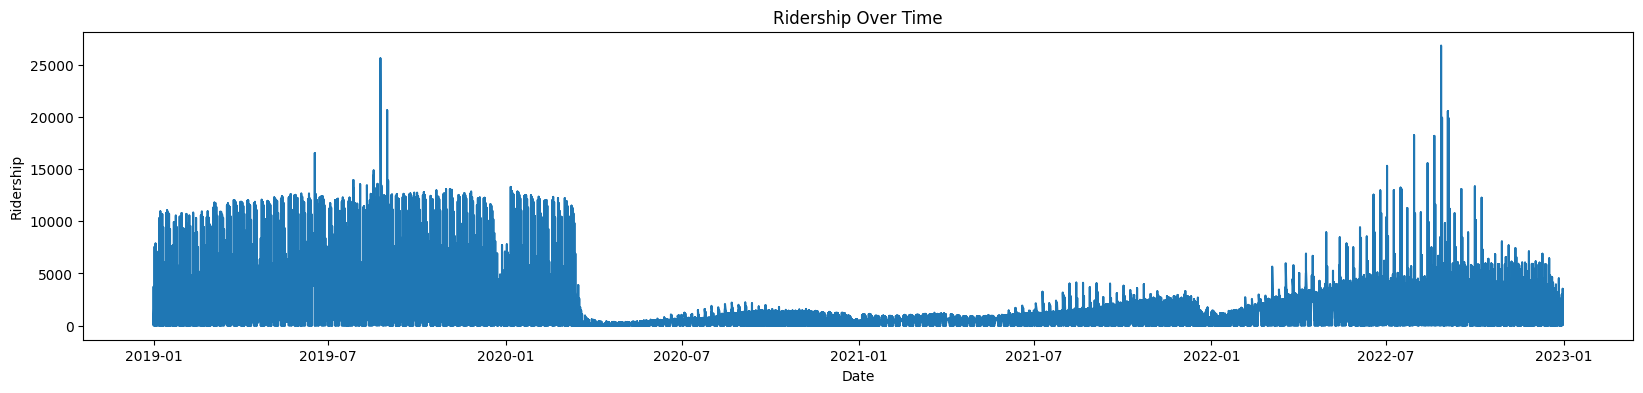

In [7]:
import matplotlib.pyplot as plt

def my_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(20, 4))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

indexes = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].map(month_mapping).astype(str) + '-' + df['Day'].astype(str))
my_plot(indexes, df['Ridership'], 'Date', 'Ridership', 'Ridership Over Time')

In [8]:
df.head()

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
0,2019,January,1,1,Corridor_1,n,Station_1,Weekend/Holiday,174,3,0
1,2019,January,1,1,Corridor_1,n,Station_2,Weekend/Holiday,378,10,0
2,2019,January,1,1,Corridor_1,n,Station_3,Weekend/Holiday,599,12,0
3,2019,January,1,1,Corridor_2,n,Station_4,Weekend/Holiday,2759,35,0
4,2019,January,1,1,Corridor_2,n,Station_5,Weekend/Holiday,2629,36,0


In [9]:
grouped_df = df.groupby(['Year', 'Month']).aggregate({'Ridership': 'sum'}).reset_index()
years = grouped_df['Year'].unique()

grouped_df.head(5)

,Year,Month,Ridership
0,2019,April,3201955
1,2019,August,3521772
2,2019,December,2807918
3,2019,February,2801587
4,2019,January,3186261


In [10]:
years

array([2019, 2020, 2021, 2022])

In [11]:
grouped_df['Month_number'] = grouped_df['Month'].map(month_mapping)
grouped_df.sort_values(by=['Year', 'Month_number'], inplace=True)   

grouped_df.head()

,Year,Month,Ridership,Month_number
4,2019,January,3186261,1
3,2019,February,2801587,2
7,2019,March,3247025,3
0,2019,April,3201955,4
8,2019,May,3366421,5


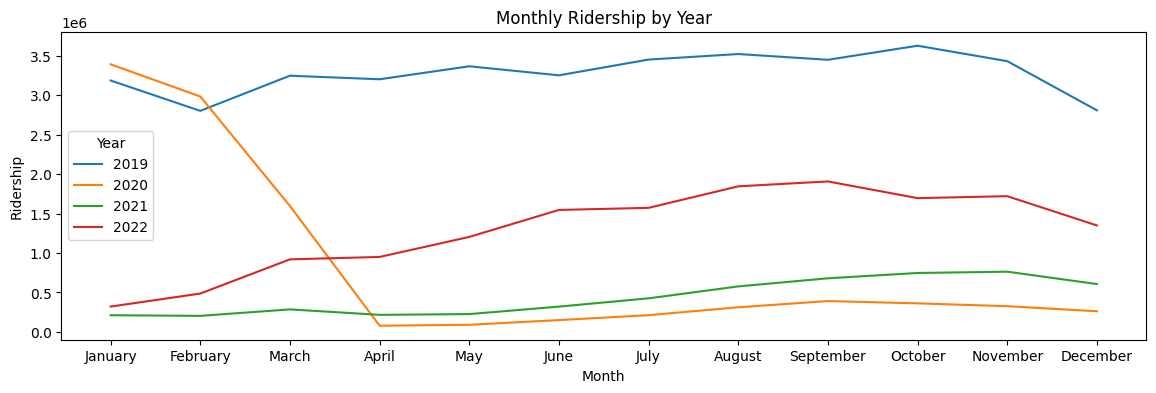

In [12]:
plt.figure(figsize=(14, 4))
for year in years:
    year_data = grouped_df[grouped_df['Year'] == year]
    plt.plot(year_data['Month'], year_data['Ridership'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Monthly Ridership by Year')
plt.legend(title='Year')

In [13]:
weekly_grouped_df = df.groupby(['Year', 'Week Number']).aggregate({'Ridership': 'sum'}).reset_index()
years = weekly_grouped_df['Year'].unique()

weekly_grouped_df.head(5)

,Year,Week Number,Ridership
0,2019,1,555004
1,2019,2,759778
2,2019,3,779986
3,2019,4,745794
4,2019,5,690214


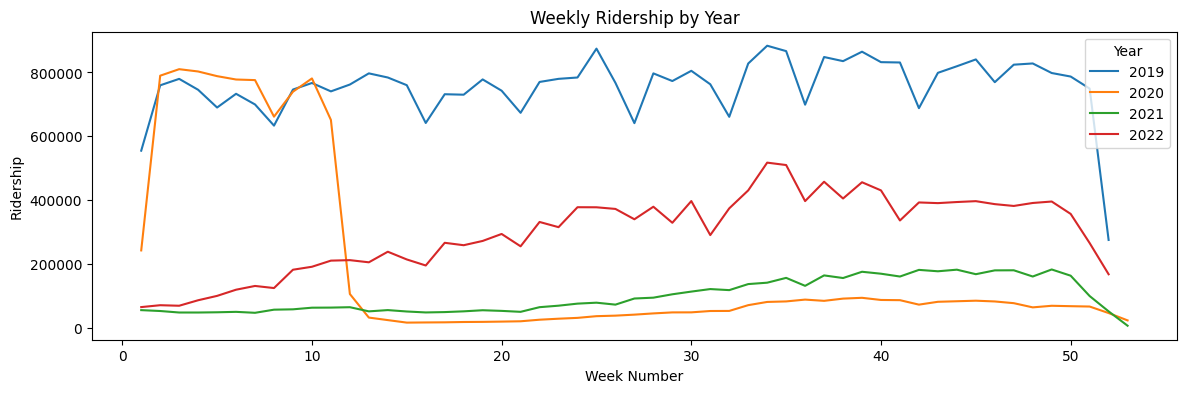

In [14]:
plt.figure(figsize=(14, 4))
for year in years:
    year_data = weekly_grouped_df[weekly_grouped_df['Year'] == year]
    plt.plot(year_data['Week Number'], year_data['Ridership'], label=str(year))

plt.xlabel('Week Number')
plt.ylabel('Ridership')
plt.title('Weekly Ridership by Year')
plt.legend(title='Year')

In [ ]:
year_2019 = df[df['Year'] == 2019]

grouped_station = year_2019_am_am_am_am_am_am_am_am.groupby(['Station', 'Month']).aggregate({'Ridership': 'sum'}).reset_index()
grouped_station['Month_number'] = grouped_station['Month'].map(month_mapping)
grouped_station.sort_values(by=['Station', 'Month_number'], inplace=True)
grouped_station.head(10)

,Station,Month,Ridership,Month_number
4,Station_1,January,129735,1
3,Station_1,February,113122,2
7,Station_1,March,125611,3
0,Station_1,April,126250,4
8,Station_1,May,127571,5
6,Station_1,June,119559,6
5,Station_1,July,131983,7
1,Station_1,August,120285,8
11,Station_1,September,129818,9
10,Station_1,October,141392,10


In [27]:
ramdom_stations = grouped_station['Station'].sample(n=5, random_state=42).unique()

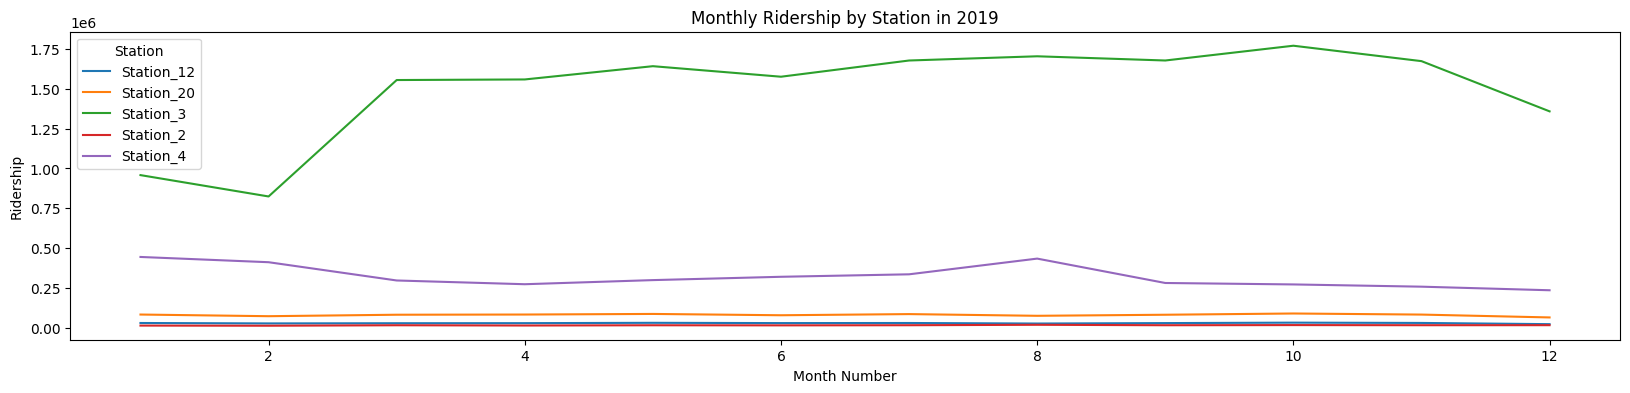

In [29]:
plt.figure(figsize=(20, 4))
for station in ramdom_stations:
    station_data = grouped_station[grouped_station['Station'] == station]
    plt.plot(station_data['Month_number'], station_data['Ridership'], label=station)

plt.xlabel('Month Number')
plt.ylabel('Ridership')
plt.title('Monthly Ridership by Station in 2019')
plt.legend(title='Station')

In [30]:
year_2019_am = df[((df['Year'] == 2019) & (df['Period'] == 'AM Peak'))]

grouped_station2 = year_2019_am.groupby(['Station', 'Month']).aggregate({'Ridership': 'sum'}).reset_index()
grouped_station2['Month_number'] = grouped_station2['Month'].map(month_mapping)
grouped_station2.sort_values(by=['Station', 'Month_number'], inplace=True)
grouped_station2.head(10)

,Station,Month,Ridership,Month_number
4,Station_1,January,107308,1
3,Station_1,February,93373,2
7,Station_1,March,102796,3
0,Station_1,April,104405,4
8,Station_1,May,104981,5
6,Station_1,June,97849,6
5,Station_1,July,105462,7
1,Station_1,August,92692,8
11,Station_1,September,105117,9
10,Station_1,October,114556,10


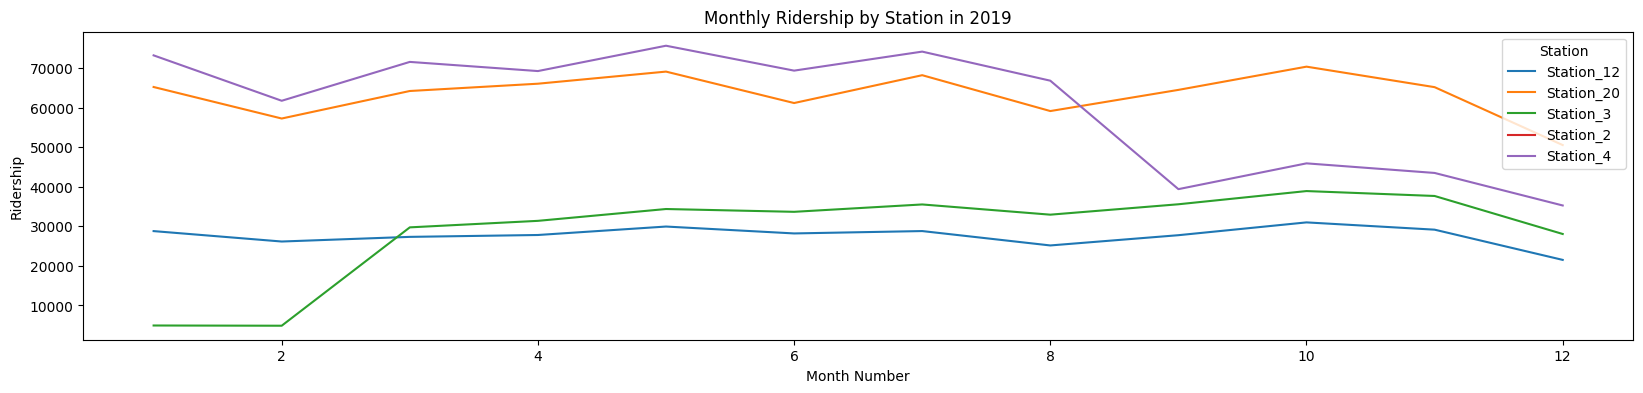

In [31]:
plt.figure(figsize=(20, 4))
for station in ramdom_stations:
    station_data = grouped_station2[grouped_station2['Station'] == station]
    plt.plot(station_data['Month_number'], station_data['Ridership'], label=station)

plt.xlabel('Month Number')
plt.ylabel('Ridership')
plt.title('Monthly Ridership by Station in 2019')
plt.legend(title='Station')